In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

**Answer to the question no 1**

In [ ]:
with open("/content/sample_data/iris.names", 'r') as f:
    print(f.read())

# print(train_data.head())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
train_data = pd.read_csv("/content/sample_data/iris.csv", header =None, names = column_names)
print(train_data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Check for missing values
missing_values =train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [ ]:
df_cleaned = train_data.dropna()
df_filled = train_data.fillna(value={'sepal_length': 0, 'sepal_width': 0, 'petal_length': 0, 'petal_width': 0})

train_data['sepal_length'].fillna(train_data['sepal_length'].mean(), inplace=True)
train_data['sepal_width'].fillna(train_data['sepal_width'].median(), inplace=True)
# Verify that there are no missing values left
print("Missing values in each column after handling:\n", df_cleaned.isnull().sum())



Missing values in each column after handling:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [ ]:
!pip install scikit-learn
from io import StringIO
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
features = train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = train_data['class']
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_scaled['class'] = target.values
print(df_scaled.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa


**Asnwer to the question no 2**

In [ ]:
summary_stats = df_scaled.groupby('class').agg({
    'sepal_length': ['mean', 'median', 'var'],
    'sepal_width': ['mean', 'median', 'var'],
    'petal_length': ['mean', 'median', 'var'],
    'petal_width': ['mean', 'median', 'var']
})

print(summary_stats)

                sepal_length                     sepal_width            \
                        mean    median       var        mean    median   
class                                                                    
Iris-setosa        -1.014579 -1.021849  0.182418    0.842307  0.800654   
Iris-versicolor     0.112282  0.068662  0.391167   -0.657184 -0.587764   
Iris-virginica      0.902297  0.795669  0.593642   -0.185122 -0.124958   

                          petal_length                     petal_width  \
                      var         mean    median       var        mean   
class                                                                    
Iris-setosa      0.777398    -1.304878 -1.284407  0.009735   -1.255129   
Iris-versicolor  0.527277     0.285087  0.336266  0.071406    0.167409   
Iris-virginica   0.556914     1.019792  1.018654  0.098495    1.087720   

                                     
                   median       var  
class                             

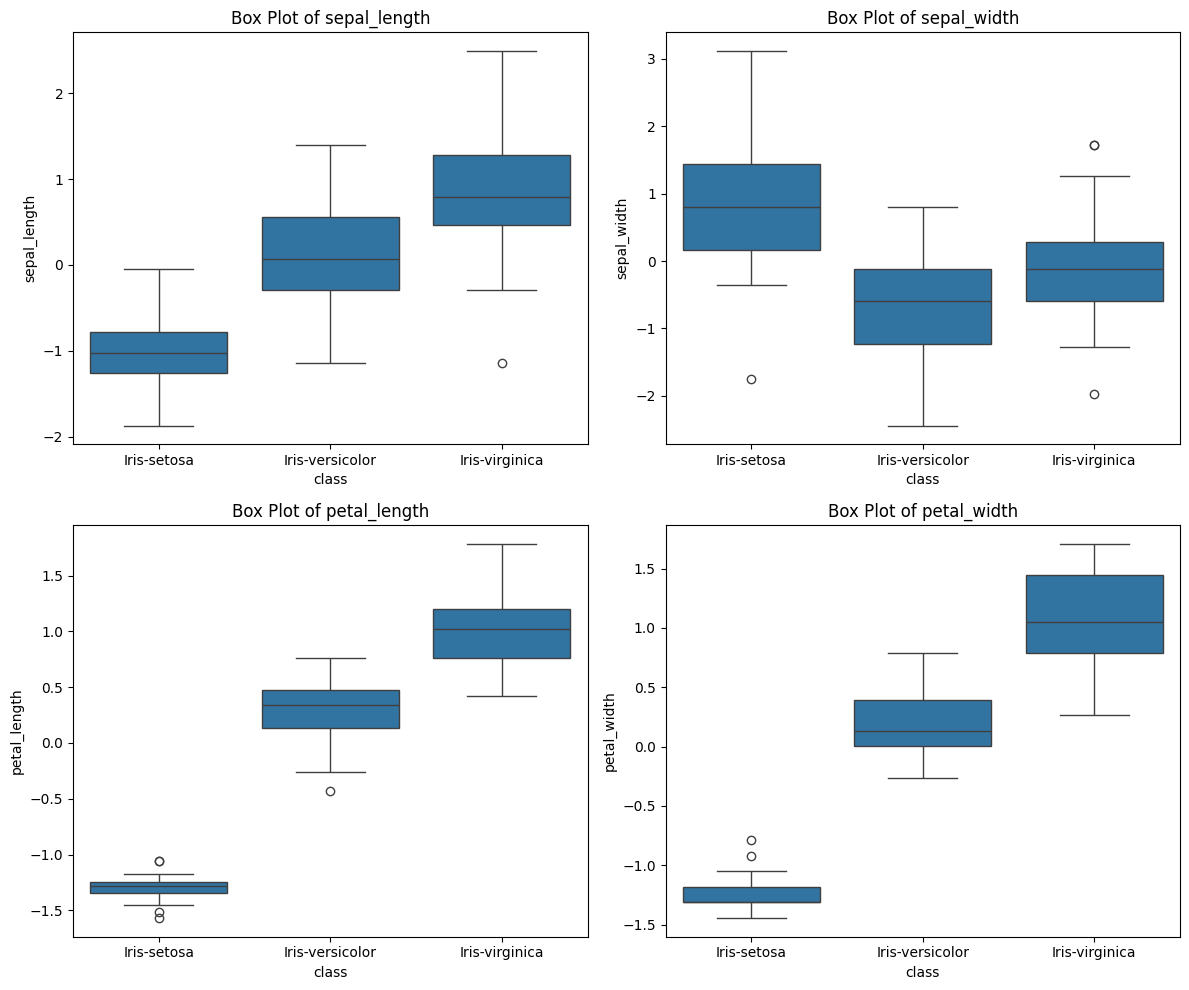

In [ ]:
plt.figure(figsize=(12, 10))

# Create box plots for each feature separated by species
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=feature, data=df_scaled)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

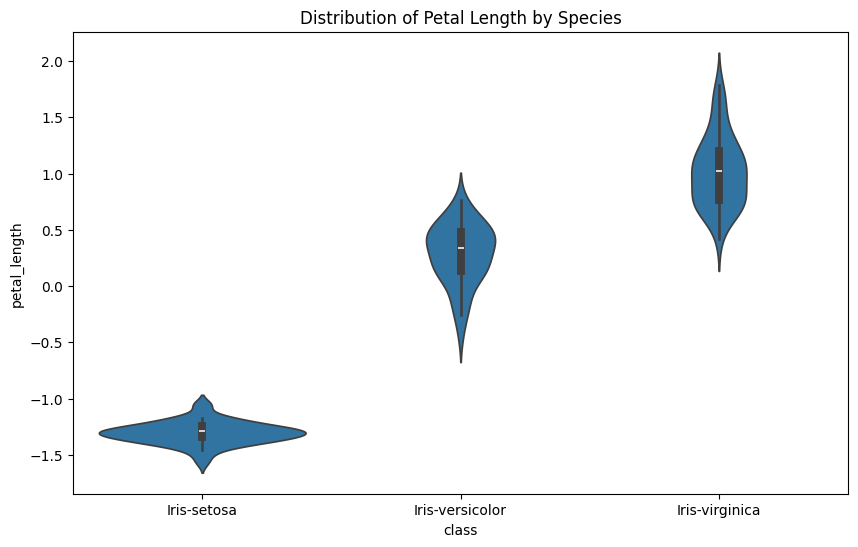

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='petal_length', data=df_scaled)
plt.title('Distribution of Petal Length by Species')
plt.show()

**Answer to the question No 3**

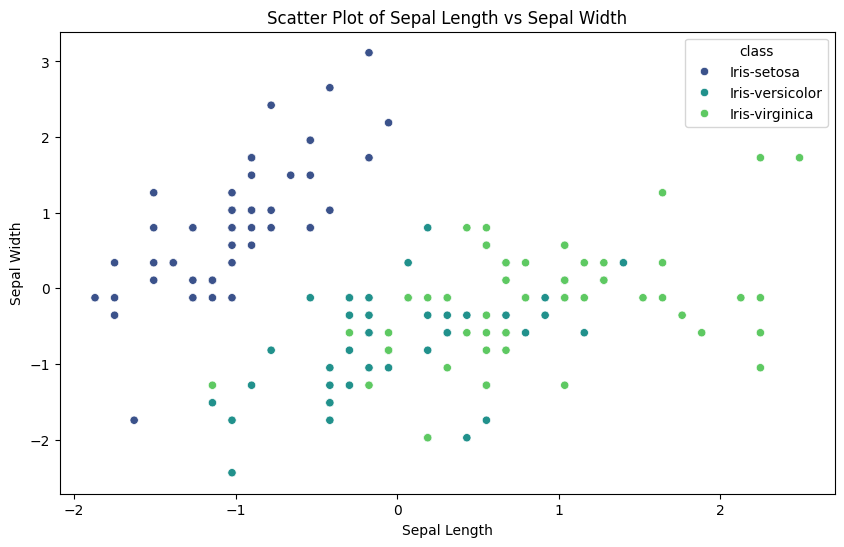

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=df_scaled, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='class')
plt.show()

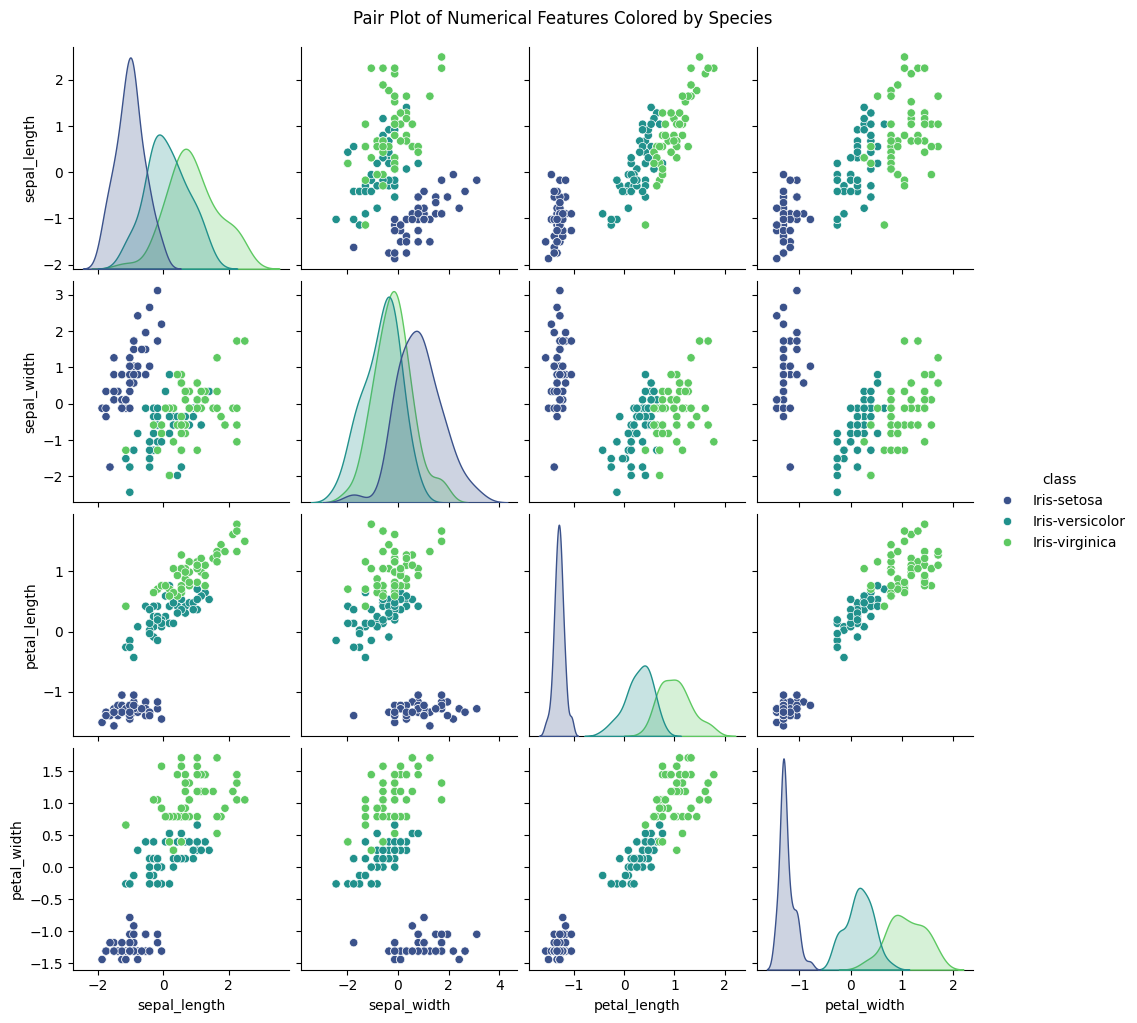

In [37]:
sns.pairplot(df_scaled, hue='class', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features Colored by Species', y=1.02)
plt.show()

**Answer to the question no 4**

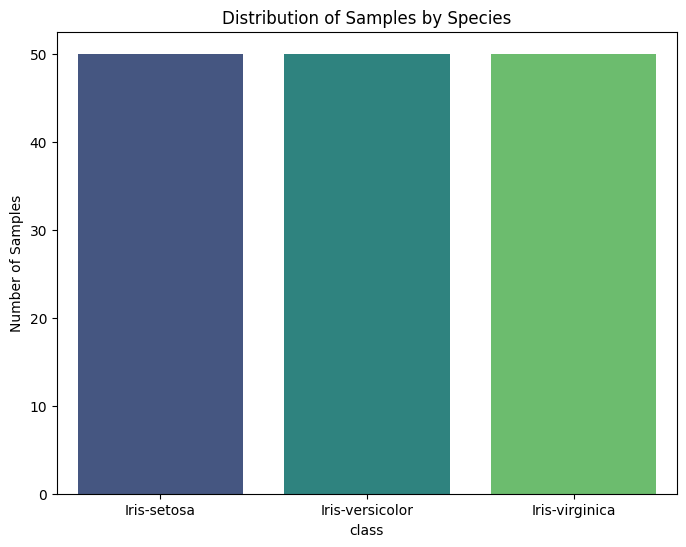

In [38]:
species_counts = train_data['class'].value_counts()

# Create a DataFrame for plotting
species_df = species_counts.reset_index()
species_df.columns = ['class', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Count', data=species_df, palette='viridis')
plt.title('Distribution of Samples by Species')
plt.xlabel('class')
plt.ylabel('Number of Samples')
plt.show()

In [39]:
# Count the number of samples for each species
species_counts = train_data['class'].value_counts()

# Calculate the percentage distribution
total_samples = len(train_data)
percentage_distribution = (species_counts / total_samples) * 100

# Create a DataFrame for displaying the results
percentage_df = percentage_distribution.reset_index()
percentage_df.columns = ['class', 'Percentage']

# Display the percentage distribution
print(percentage_df)

             class  Percentage
0      Iris-setosa   33.333333
1  Iris-versicolor   33.333333
2   Iris-virginica   33.333333


**Answer to  the question no 5**

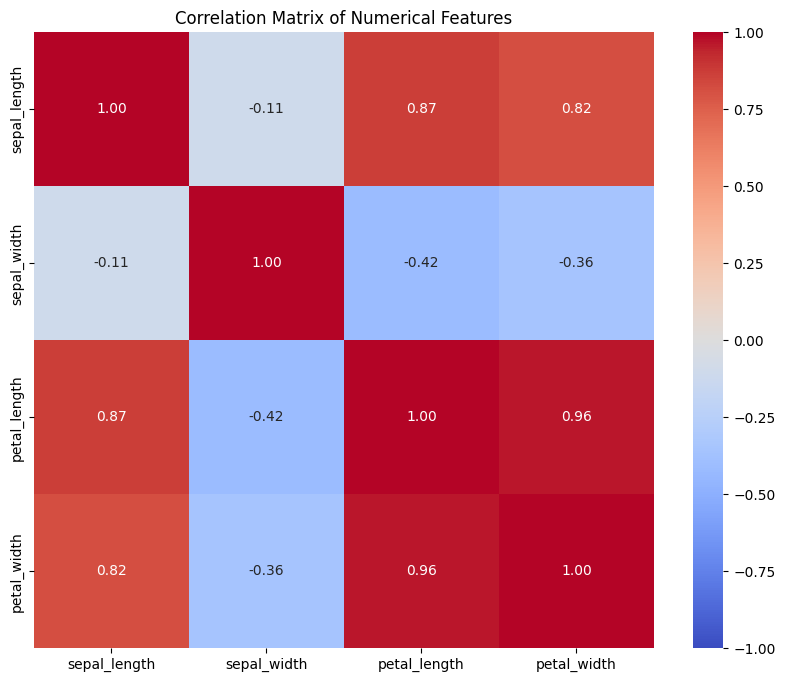

In [40]:
# Compute the correlation matrix for the numerical features
correlation_matrix = train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Correlation Matrix for Iris-setosa:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.746780      0.263874     0.279092
sepal_width       0.746780     1.000000      0.176695     0.279973
petal_length      0.263874     0.176695      1.000000     0.306308
petal_width       0.279092     0.279973      0.306308     1.000000

Correlation Matrix for Iris-versicolor:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.525911      0.754049     0.546461
sepal_width       0.525911     1.000000      0.560522     0.663999
petal_length      0.754049     0.560522      1.000000     0.786668
petal_width       0.546461     0.663999      0.786668     1.000000

Correlation Matrix for Iris-virginica:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.457228      0.864225     0.281108
sepal_width       0.457228     1.000000      0.401045     0.537728
petal_lengt

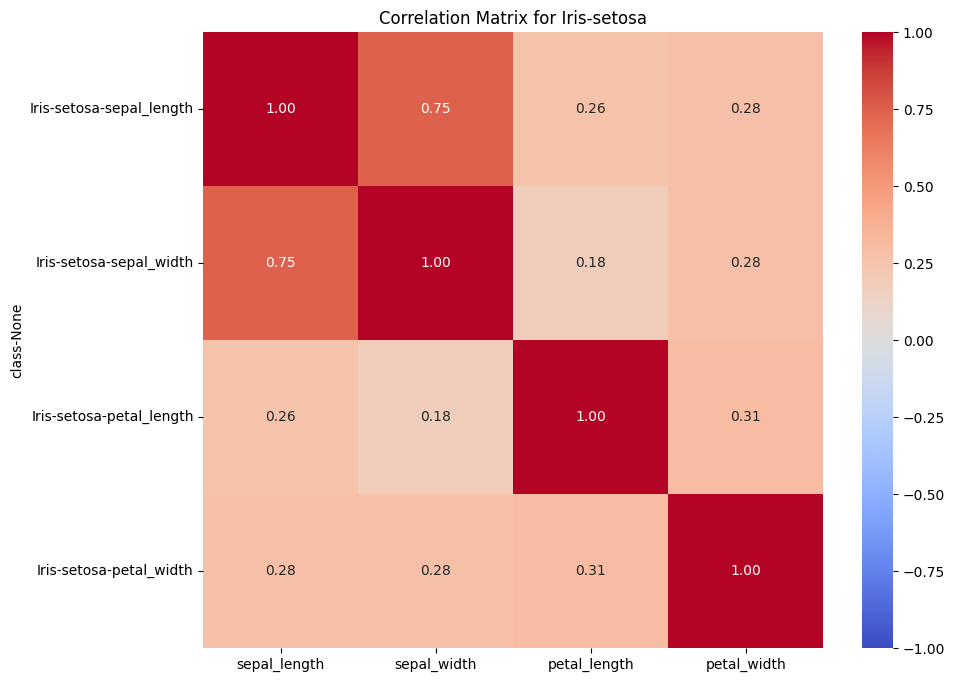

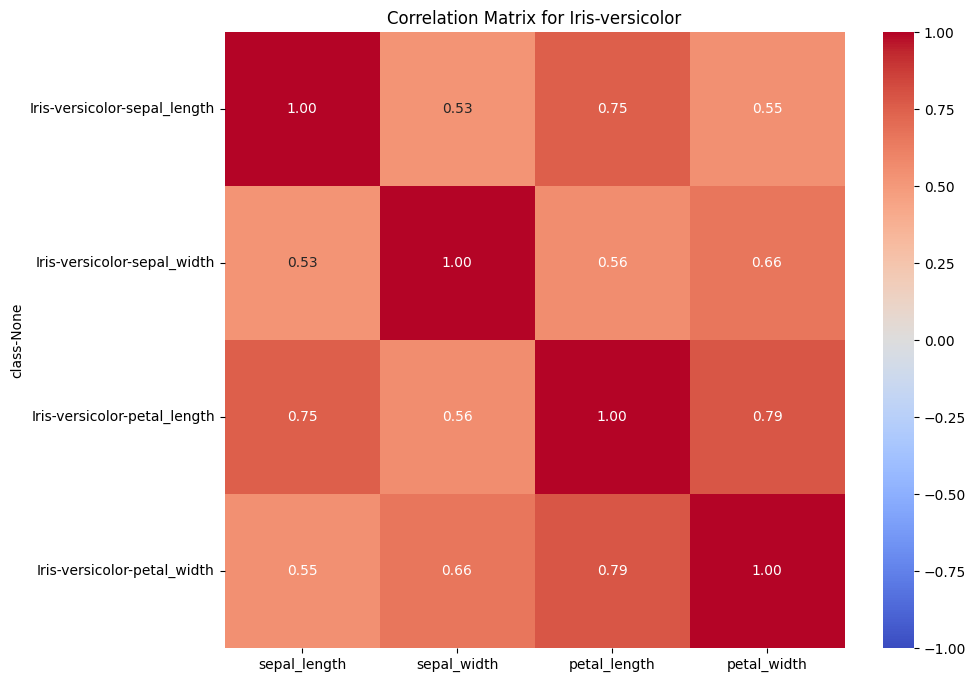

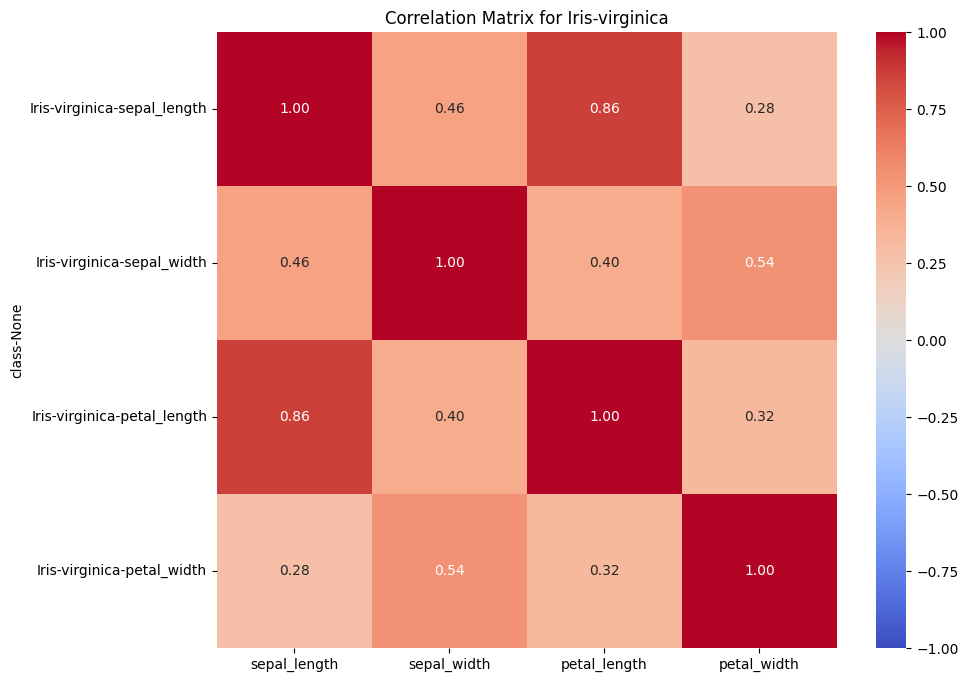

In [41]:
# Compute correlation matrices for each species
species_corr = train_data.groupby('class').apply(lambda x: x[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr())

# Print correlations for each species
for species, corr_matrix in species_corr.groupby(level=0):
    print(f"\nCorrelation Matrix for {species}:")
    print(corr_matrix.reset_index(level=0, drop=True))

# Optionally visualize the correlation matrices
for species, corr_matrix in species_corr.groupby(level=0):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {species}')
    plt.show()
